# DSCI 525 - Web and Cloud Computing

***Milestone 3:*** The purpose of this milestone is to set up your spark cluster and develop your machine learning to deploy in the cloud for the next milestone

## Milestone 3 checklist  :

- [ ] Setup your EMR cluster with Spark & JupyterHub.  
- [ ] Setup your WebBrowser(Firefox) for EMR.
- [ ] Develop a ML model using scikit-learn. (We will be using this model to deploy for our next milestone.)
- [ ] Obtain best hyperparameter settings using spark's MLlib.

**Keep in mind:**

- _Please use Firefox browser in this milestone. Adding configuration in Step 2._

- _All services you use are in region Canada ca-central-1._

- _Use only default VPC and subnet, also if not specified explicitly in instruction, leave those options as default when setting up an instance and s3._
    
- _No IP addresses are visible when you provide the screenshot (***Please mask it before uploading***). In my screenshots I terminated those clusters before uploading it to GitHub, and hence you see there._

- _Only person in your group spins up the EMR cluster with ```m5.xlarge```.***_

- _Say something went wrong and you want to spin up another EMR cluster, then make sure you terminate the previous one._

- _Upon termination, stored data in your cluster will be lost. Make sure you save any data to S3 and download the notebooks to your laptop so that next time you have your jupyterHub in a different cluster, you can upload your notebook there._

_***Outside of Milestone [OPTIONAL]:*** If you are working as an individual to just practice setting up EMR clusters, make sure you select ```m4.large``` single node cluster and stick to other ```settings/instructions``` given in this milestone. On that note, you won't be able to do much with this cluster as it's too small to do something, but good enough to get experience (***maybe subset your data before you try something***). However, we won't be looking at it for grading purposes._

***SUBMISSION:*** Please put a link in canvas where TAs can find the following-
- [ ] Python 3 notebook, with the code for ML model in scikit-learn. (You can develop this on your existing jupyterHub in your EC2 instance, from milestone2)
- [ ] PySpark notebook, with the code for obtaining best hyperparameter settings. ( For this you have to use PySpark notebook in your EMR cluster )
- [ ] Screenshot from 
    - [ ] Setup your EMR cluster (Task 1).
    - [ ] Setup your browser , jupyter environment & connect to the master node (Task 2). 
    - [ ] Your S3 bucket showing ```model.joblib``` file. (From Task 3 Develop a ML model using scikit-learn)

### 1. Setup your EMR cluster
rubric={correctness:25}

Follow the instructions shown during the lecture to set up your EC2 instance. Please make sure you follow the below instructions.

1.1) Go to advanced options.

1.2) Choose Release 6.2.0.

1.3) Check JupyterHub 1.1.0 & Spark 3.0.1.

1.4) Core instances to be 0, master 1.
    
1.5) Root device EBS volume size 30 GB.

1.6) Cluster name : <Your-groups-name>.
    
1.7) Uncheck Termination protection.
    
1.6) Add tag, enter "Owner" under the Key field. In the Value field in the Name row, give your <IAM username>.
    
1.9) Select your keypair what you have used in your previous milestone (milestone 2).

1.10) EC2 security group go with the default. Remember this is a managed service, what we learned from the shared responsibility model, and hence AWS will take care of many things. EMR comes in the list of container services. Check [this]( https://aws.amazon.com/blogs/industries/applying-the-aws-shared-responsibility-model-to-your-gxp-solution/).
    
1.11) Wait for the cluster to start. This takes around ~15 min. Wait for your cluster status to be **Waiting** . 

#### Please attach this screen shots from your group for grading
https://github.ubc.ca/MDS-2020-21/DSCI_525_web-cloud-comp_students/blob/master/Milestones/milestone3/images/Task1.png

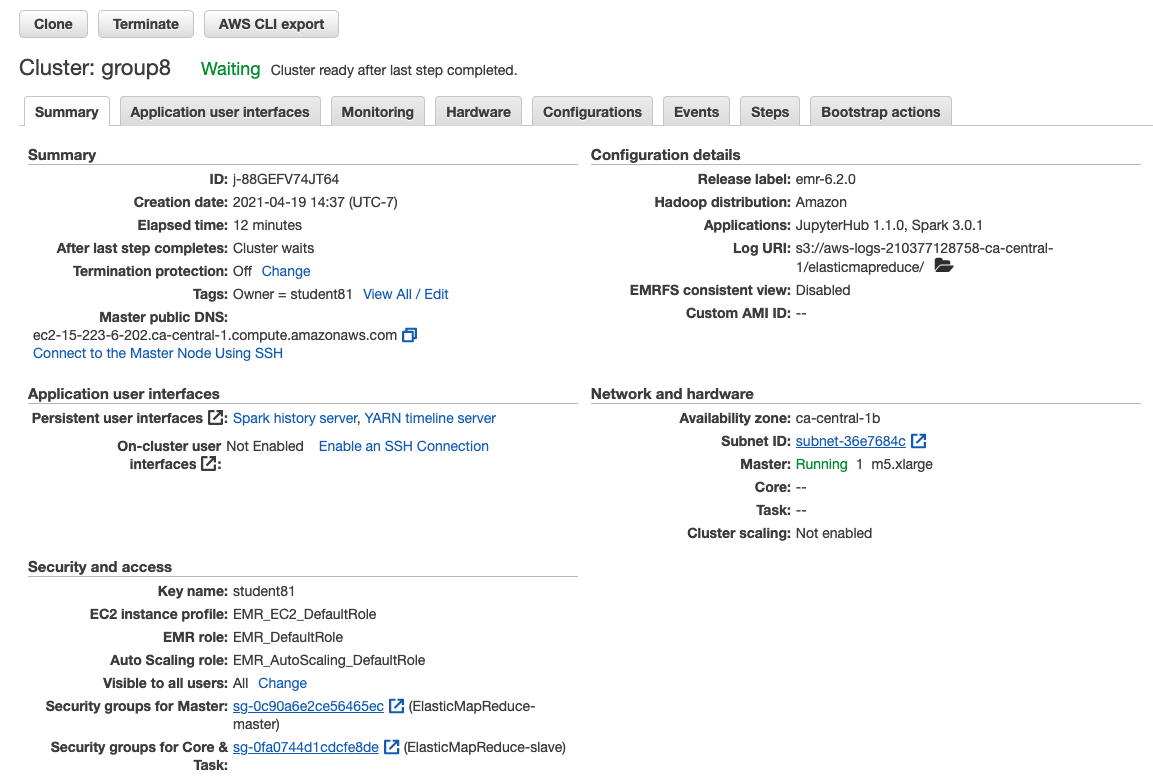

### 2. Setup your browser , jupyter environment & connect to the master node.
rubric={correctness:25}

2.1) Under cluster ```summary > Application user interfaces > On-cluster user interfaces```: Click on _***Enable an SSH Connection***_.

2.2) From instructions in the popup from Step 2.1, use: **Step 1: Open an SSH Tunnel to the Amazon EMR Master Node.** Remember you are running this from your laptop terminal, and after running, it will look like [this](https://github.ubc.ca/MDS-2020-21/DSCI_525_web-cloud-comp_students/blob/master/Milestones/milestone3/images/eg.png).

2.3) From instructions in the popup from Step 2.1, please ignore **Step 2: Configure a proxy management tool**. Instead follow  instructions given [here](https://docs.aws.amazon.com/emr/latest/ManagementGuide/emr-connect-master-node-proxy.html), under section **Example: Configure FoxyProxy for Firefox:**. Get foxyproxy standard [here](https://addons.mozilla.org/en-CA/firefox/addon/foxyproxy-standard/) 

2.4) Move to **application user interfaces** tab, use the jupytetHub URL to access.

2.4.1) Username: jovyan, Password :jupyter. These are default more details [here](https://docs.aws.amazon.com/emr/latest/ReleaseGuide/emr-jupyterhub-user-access.html)

2.5)[ OPTIONAL ] Remember, we are using EMR managed jupyterHub, and the setup they have is different from TLJH. So before you add users in jupyterHub, run this by SSHing into the master node. Follow the instruction ```cluster summary > Connect to the Master Node Using SSH```. Remember, you are running this from your laptop terminal. Once you get inside the server/instance, add your team members.

     sudo docker exec jupyterhub useradd -m -s /bin/bash -N <your team member IAM id>
     sudo docker exec jupyterhub bash -c "echo <your team member IAM id>:<your team member password> | chpasswd"

2.6) Login into the master node from your laptop terminal (```cluster summary > Connect to the Master Node Using SSH```), and install necessary packages. Here are needed packages based on the solution that I have; you might have to install other packages depending on your approach.

    sudo yum install python3-devel
    sudo pip3 install pandas
    sudo pip3 install s3fs

**IMPORTANT:** Make sure ssh -i ~/ggeorgeAD.pem -ND 8157 hadoop@xxxxx.compute.amazonaws.com is running in your terminal window before trying to access your jupyter URL. Sometimes the connection might lose; in that case run that step again to access your jupyterHub.

#### Please attach this screen shots from your group for grading
https://github.ubc.ca/MDS-2020-21/DSCI_525_web-cloud-comp_students/blob/master/Milestones/milestone3/images/Task2.png

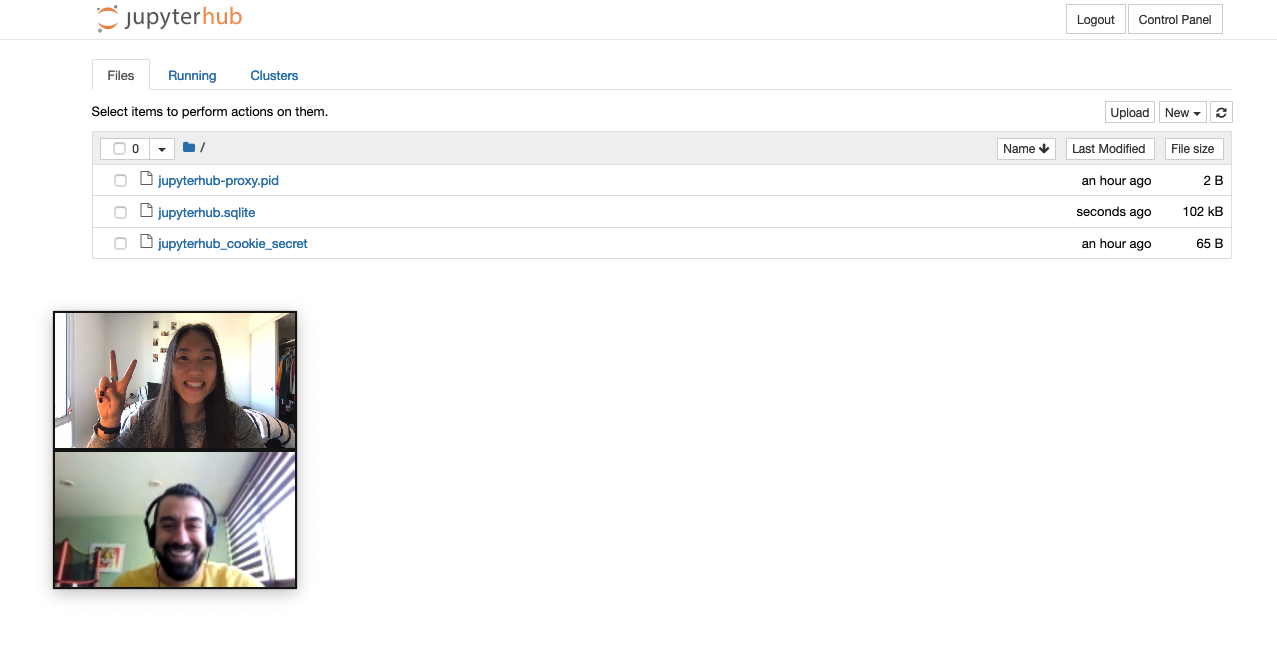

### 3. Develop a ML model using scikit-learn.
rubric={correctness:25}

Upload this notebook to your jupyterHub (TLJH in your EC2) from your previous milestone and follow instruction given there.
https://github.ubc.ca/MDS-2020-21/DSCI_525_web-cloud-comp_students/blob/master/Milestones/milestone3/Milestone3-Task3.ipynb

Please see this link for task 3: https://github.com/UBC-MDS/525-group8/blob/milestone_3/notebooks/milestone_3_files/Milestone3-Task3.ipynb

### 4. Obtain best hyperparameter settings using spark's MLlib.
rubric={correctness:20}

Upload this notebook to your jupyterHub (AWS managed jupyterHub in cluster) you setup in Task 2 and follow instruction given there.
https://github.ubc.ca/MDS-2020-21/DSCI_525_web-cloud-comp_students/blob/master/Milestones/milestone3/Milestone3-Task4.ipynb

Please see this link for task 4: https://github.com/UBC-MDS/525-group8/blob/milestone_3/notebooks/milestone_3_files/Milestone3-Task4.ipynb


### 5. Submission instructions

rubric={mechanics:5}

In the textbox provided on Canvas for the Milestone 1 assignment include:

The URL of your public project's repository
The URL of your notebook for this milestone